# DATA_SCI 422 and EARTH 353 | Exercise 1

## Multilateration (locate a signal source)

### Yangdongling Liu

**General**

The location of an event is described by its coordinates in three dimensions and the time at which it occurred. When the event emitted signals that were measured by detectors (the forward problem), we can use the arrival times of the signals to infer the location and time of the event (the inverse problem). Both the forward and the inverse problem require the same knowledge of the theory and model that describe how the signal is emitted and how it propagates to the detectors.

The process of locating an event using measurements at multiple detectors is called multilateration. If using only three detectors, it’s called trilateration, but it is often colloquially referred to as “triangulation”, which is a misnomer.

the same or similar solution methods for the inverse problem apply to many types of multilateration cases (GPS, ocean acoustics (for biological and defense purposes), inner-city crime, astrophysics, signal processing, glaciology, etc.)


**Specific application: 
Find the hypocenter and origin time of a January 2019 earthquake in Alaska**

Here we apply trilateration to the problem of determining the location (hypocenter) and origin time (the time at which “the fault slipped”). The hypocenter is an earthquake’s location in three dimensions (latitude, longitude, and depth), while the epicenter is its location in two dimensions (latitude and longitude).

The seismic waves generated by an earthquake are registered at seismic stations. An earthquake can be located using the arrival times of these seismic (P) waves as measured at several seismic stations (detectors). In this exercise we will invert P-wave arrival times for the location and origin time of an earthquake.



A P-wave is the fastest-propagating type of seismic wave generated by earthquakes. You will locate the epicenter of a regional earthquake using P-wave arrival times measured at stations of Earthscope’s USArray in Alaska. Assume that the P waves travel with a constant, known velocity $\alpha$ along straight wave paths from the earthquake's hypocenter to the detector (a station). Although a seismologist would not consider these to be valid assumptions we will see that they are quite reasonable within the confines of this exercise.

A P-wave's arrival time $t_i $ at the $i-th $ station depends on the origin time $t_o$ and the distance $D_i$

to the hypocenter $(x_o,y_o,z_o)$ as follows: 
$$t_i = {t_o} + \frac{D_i (x_o,y_o,z_o)}{\alpha}$$,
where 
$$D_i (x_o,y_o,z_o) = \sqrt{(x_i-x_o)^2 + (y_i-y_o)^2 + (z_i-z_o)^2}$$ .

**Q1**: Given the above equations, is retrieving the hypocenter from P wave arrival times a linear or a non-linear inverse problem? Why?

**A1**: Non-linear, because the relationship between the model parameters and the observed/predicted data is non-linear (the distance is the square root of the sum of three quadratic functions).

**Q2**: From how many stations do we need observed P-wave arrival times to resolve the origin time and hypocenter of an earthquake? Explain your answer.

**A2**: At least four, because there are four model parameters $(x_o, y_o, z_o, t_o)$ to be determined.

Think about the above equation, in particular with respect to which variables represent data and which variables represent the model (or, the set of parameters we wish to infer). You want to write the equation in such a way that the data are on the left-hand side of the $=$ sign and the function that predicts the data from the model parameters is on the right-hand side. 

**Q3**: The way we go about solving this system of equations (one per measured arrival time for a given station) is by firstly making an educated initial guess of the origin time and hypocenter, say $(t_o, x_o, y_o, z_o)$ and, secondly, approximating the above equation by a first-order Taylor Expansion around this initial guess. The equation will then have factors of the form $(\widehat{x_o} - x_o)$, etc., where $(\widehat{t_o}, \widehat{x_o}, \widehat{y_o}, \widehat{z_o})$ is your new and updated, yet unknown estimate of the earthquake's origin parameters. 

**A3**:
$$t_i-t_o-\frac{D_i (x_o,y_o,z_o)}{\alpha} = (\widehat{t_o}-t_o) + (\frac{1}{2\alpha*D_i})*2(x_o-x_i)(\widehat{x_o}-x_o) + (\frac{1}{2\alpha*D_i})*2(y_o-y_i)(\widehat{y_o}-y_o) + (\frac{1}{2\alpha*D_i})*2(z_o-z_i)(\widehat{z_o}-z_o)$$

Now define $d_i = t_i - t_o - \frac{D_i (x_o, y_o, z_o)}{\alpha}$ and $\mathbf{m} = (\widehat{t_o}-t_o,\widehat{x_o}-x_o,\widehat{y_o}-y_o,\widehat{z_o}-z_o)_T$. Use $\mathbf{d} $ and $\mathbf{m}$ in a rewrite of your first-order Taylor expansion of the above equation. 


**Q4**: Does this new system of equations pose a linear or non-linear inverse problem? Why?

**A4**: 
$$\mathbf{d} = \begin{pmatrix}1&(\frac{1}{\alpha*D_1})*(x_o-x_1)&(\frac{1}{\alpha*D_1})*(y_o-y_1)&(\frac{1}{\alpha*D_1})*(z_o-z_1)\\1&(\frac{1}{\alpha*D_2})*(x_o-x_2)&(\frac{1}{\alpha*D_2})*(y_o-y_2)&(\frac{1}{\alpha*D_2})*(z_o-z_2)\\...\\1&(\frac{1}{\alpha*D_i})*(x_o-x_i)&(\frac{1}{\alpha*D_i})*(y_o-y_i)&(\frac{1}{\alpha*D_i})*(z_o-z_i)\\...\end{pmatrix}\mathbf{m}$$
Yes, now this is a linear inverse problem, because the data are linearly related to the newly defined \mathbf{m} after the first-order Taylor Expansion.

Having now defined a model vector and a data vector, it becomes clear what the rows of the design matrix $\mathbf{G}$ represent, if we write the location problem as $\mathbf{d} = \mathbf{Gm}$, or, in index notation $d_i = G_{ij} m_j$ (applying the Einstein summation convention). 

**Q5**: Write out the i-th row of matrix G of the earthquake location problem.

**A5**: the i-th row of matrix $\mathbf{G}$ 
$$\begin{pmatrix}1&(\frac{1}{\alpha*D_i})*(x_o-x_i)&(\frac{1}{\alpha*D_i})*(y_o-y_i)&(\frac{1}{\alpha*D_i})*(z_o-z_i)\end{pmatrix}$$

Use Python or another programming language to locate the earthquake. First import needed modules, such as numpy, for computation with 1- and 2-dimensional arrays (like matrices) as well as matplotlib functions for plotting:

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To compute distances we need to know how many kilometers correspond to a $\deg$ in latitude and longitude. For Alaska we can approximate $1\deg$ in latitude by 111.19 km and $1\deg$ in longitude by about 56 km. 

**Q6**: Store these values, as well as the constant value assumed for α = 7.7 km/s, in separate variables.

**A7**:

In [76]:
alpha = 7.7 #velocity km/s
a2k = 111.19 #latitude km/deg
o2k = 56 #longitude km/deg

I have already downloaded the real station coordinates (from IRIS) and real P wave arrival times (from the USGS) for you and stored them in a file called `loctim.txt` and you just need to read it in:

In [77]:
dlines = open('loctim.txt','r').readlines()
n = len(dlines)
obsis = np.arange(n)
lat = []; lon = []; elv = []; Ptm = []; sta = []
for i in obsis:
  line = dlines[i].split()
  lat.append(float(line[0])*a2k)
  lon.append(float(line[1])*o2k)
  elv.append(-float(line[2]))
  Ptm.append(float(line[3]))
  sta.append(line[4])

The fourth column in the file is the P wave arrival time (in seconds after reference time 04:43) for 63 stations. The third column contains station elevation. W

**Q7**: Why is a minus sign used when it is appended to the list of elevations?

**A7**: When calculating $D_i$, the elevation term is $(z_o-z_i)^2$. The earthquake occurs underground, whereas the stations are above the ground. Therefore, the "depth" of the earthquake ($z_o$) and the "height" of the stations ($z_i$) should actually be added up. By adding a minus sign to the "height", we essentially define the "depth" to be positive and the "height" to be negative so that taking difference between $z_o$ and $z_i$ is equivalant to adding up the depth and height.

Now you need to make a first guess at the origin time and hypocenter. It might help to first show the station locations on a map, with or without state borders and other topographic features. If you don't have or have experience with cartographic Python functions, just convert the coordinates to km and plot them in a Cartesian projection (basically an xy plot).

Then, based on the map and each station’s P wave arrival time, make an educated initial guess for the hypocenter $(x_o, y_o, z_o)$. Then do the same for $t_o $ by dividing the estimated distance from the guessed hypocenter to a station by the P wave velocity. 

**Q8**: Plot your initial guess of the epicenter (the point on the Earth's curgface directly above the hypocenter) on your map with a clearly identifyable symbol, and include the station locations on the map using another symbol. 


**A8**:

-8698.3736 6472.3699


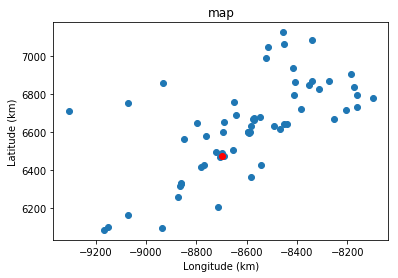

In [78]:
fig, ax = plt.subplots()
plt.title('map')
plt.xlabel('Longitude (km)')
plt.ylabel('Latitude (km)')
ax.scatter(lon,lat)

# initial guess: the station with the shortest arrival time
x_o = -155.3281*o2k
y_o = 58.21*a2k
z_o = 100
t_o = 10
print(x_o,y_o)
ax.scatter(x_o,y_o,c='r')

**Q9**: Now have your program compute 
1. the vector $\mathbf{D} = \mathbf{D}(x_o,y_o,z_o)$ with distances to all stations, 
2. the data vector with arrival times, corrected for the arrival times predicted from the initial guess, and
3. the matrix $\mathbf{G}$ as defined above.

**A9**:

In [79]:
#1
D = np.zeros((n,1))
for i in obsis:
    Di = np.sqrt((lon[i]-x_o)**2+(lat[i]-y_o)**2+(elv[i]-z_o)**2)
    D[i] = [Di]
#print(D[0:5])

#2
d = np.zeros((n,1))
for i in obsis:
    di = Ptm[i]-t_o-D[i]/alpha
    d[i] = di
#print(d[0:5])

#3
G = np.zeros((n,4))
for i in obsis:
    G[i,0] = 1
    G[i,1] = (x_o-lon[i])/alpha*D[i]
    G[i,2] = (y_o-lat[i])/alpha*D[i]
    G[i,3] = (z_o-elv[i])/alpha*D[i]
#print(G[0:5,:])

**Q10**: Use `numpy.linalg` to compute the generalized inverse matrix $\mathbf{G}^{-g} = (\mathbf{G}^T\mathbf{G})^{-1}\mathbf{G}^T$ for the least squares solution $m_j = G_{ji}^{-g} d_i $ to the problem $ d_i = G_{ij} m_j$.

**A10**:

In [80]:
Gg = np.linalg.inv(G.T.dot(G)).dot(G.T)
print(Gg[0])

[ 0.06013964  0.06007593  0.02983926  0.02653142  0.04380104  0.04400105
  0.04399326  0.0445722   0.04434709  0.02835916 -0.03558661 -0.01212322
  0.02252005  0.02115684 -0.0050819   0.01602409  0.01569405 -0.02830315
  0.02671523 -0.00359325 -0.02618391 -0.02444095 -0.06074872  0.00680293
 -0.00659367 -0.01817291  0.02920748  0.03467074  0.03459435 -0.06755999
  0.03364052  0.05781725  0.06017272  0.04158722  0.05928342 -0.02600224
 -0.00688787 -0.00992047  0.0601889   0.00758501 -0.03275532  0.00054444
  0.00133841 -0.01375286 -0.02574355 -0.0171501   0.02753225  0.04008928
  0.04273528  0.03667836  0.03090596  0.00842563  0.0408194   0.0423845
  0.05029822  0.0495588   0.0395375  -0.00894419  0.05111658  0.05368259
 -0.00316078 -0.03450194 -0.00176043]


**Q11**: Use $\mathbf{G}^{-g}$ to compute the model vector $\mathbf{m}$, which represents adjustments to the initial guess of the hypocenter and origin time. Then update the initial guess with the values from vector $\mathbf{m}$ and plot the new epicenter on the map.

**A11**:

[[  1.18714205e+01]
 [  2.22119804e-05]
 [  9.49645846e-05]
 [ -2.86056296e-04]]
New Location: [-8698.37357779] [ 6472.36999496]


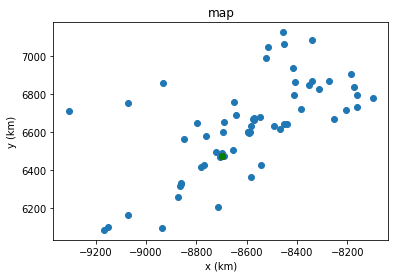

In [81]:
m = Gg.dot(d)
print(m)

fig, ax = plt.subplots()
plt.title('map')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
ax.scatter(lon,lat)
ax.scatter(x_o,y_o,c='r')

t_o = t_o + m[0]
x_o = x_o + m[1]
y_o = y_o + m[2]
z_o = z_o + m[3]
print("New Location:",x_o,y_o)
ax.scatter(x_o,y_o,c='g')

**Q12**: Redefine the initial guess as the updated epicenter and origin time and repeat the procedure in Q9 through Q11 until the solution has converged. Choose a suitable convergence criterion to stop the iterative inversion process and explain and/or justify your choice. 

You may use an estimate of the error in the data, if you so choose, of 5 s. That's rather large for a measured time, but might so partially compensate for some rather coarse approximations in distances, wave propagation, and Earth properties. 


**A12**:

In [82]:
iteration = 0
while m[0]>5 or m[0]<-5:
    
    iteration = iteration + 1
    
    D = np.zeros((n,1))
    for i in obsis:
        Di = np.sqrt((lon[i]-x_o)**2+(lat[i]-y_o)**2+(elv[i]-z_o)**2)
        D[i] = [Di]

    d = np.zeros((n,1))
    for i in obsis:
        di = Ptm[i]-t_o-D[i]/alpha
        d[i] = di

    G = np.zeros((n,4))
    for i in obsis:
        G[i,0] = 1
        G[i,1] = (x_o-lon[i])/alpha*D[i]
        G[i,2] = (y_o-lat[i])/alpha*D[i]
        G[i,3] = (z_o-elv[i])/alpha*D[i]

    Gg = np.linalg.inv(G.T.dot(G)).dot(G.T)
    m = Gg.dot(d)
    
    t_o = t_o + m[0]
    x_o = x_o + m[1]
    y_o = y_o + m[2]
    z_o = z_o + m[3]

print("Converged m:",m)
print("Number of Iteration(s):",iteration)
print("Time:",t_o,"s")
print("Longitude:",x_o/o2k,"deg")
print("Latitude:",y_o/a2k,"deg")
print("Depth:",z_o,"km")

Converged m: [[  3.42862773e-05]
 [  2.22119341e-05]
 [  9.49642017e-05]
 [ -2.86061414e-04]]
Number of Iteration(s): 1
Time: [ 21.87145477] s
Longitude: [-155.32809921] deg
Latitude: [ 58.21000171] deg
Depth: [ 99.99942788] km


**Q13**: Graduate students only: Finally, compute the covariance matrix for model vector $\mathbf{m}$ and estimate the standard deviation in origin time and hypocentral coordinates, presuming for simplicity that the arrival time data have a standard deviation of 5.0 s. 

1. Find the earthquake on earthquake.usgs.gov and report on the actual, USGS-inferred hypocenter, origin time, and magnitude.
2. Is your best earthquake epicenter north, east, south, or west of the one from the USGS? 
3. How confident are you of your answer? 
4. Draw an error ellipse around the epicenter?
5. What does orientation of the long axis of the ellipse tell us and why is this so?
6. Which of the hypocenter coordinates is the most uncertain?
7. What tectonic explanation does the USGS provide and what does that imply for the chances that a similar earthquake will occur again in the same or nearby place?  

To draw an error ellipse, you may use the following code snippet, where 

**A13**:

In [83]:
# Compute the covariance matrix for model vector m
sigma_data = 5.0
covm = sigma_data**2*np.linalg.inv(G.T.dot(G))
sigma_m = np.diag(covm)
print(sigma_m)

#because m = new model parameters - old model parameters
print("standard deviation in origin time:",np.sqrt(sigma_m[0]),'s')
print("standard deviation in longitude:",np.sqrt(sigma_m[1]),'km')
print("standard deviation in latitude:",np.sqrt(sigma_m[2]),'km')
print("standard deviation in depth:",np.sqrt(sigma_m[3]),'km')

[  2.01043957e+00   1.86274133e-09   2.90043931e-09   9.89155300e-08]
standard deviation in origin time: 1.41789970291 s
standard deviation in longitude: 4.31594871317e-05 km
standard deviation in latitude: 5.38557268179e-05 km
standard deviation in depth: 0.000314508394102 km


**Answers to the quesions in Q13:**
1. hypocenter: 58.332°N, 155.323°W, 121.5 km depth, origin time 2019-01-22 04:43:19 (UTC), M 5.2.
from https://earthquake.usgs.gov/earthquakes/eventpage/ak01910ggmj6/executive
2. My inferred epicenter is 58.210°N, 155.328°W, which is southeast of the one from the USGS.
3. I'm confident of the epicenter since it's very close to the USGs-inferred epicenter, but I'm not confident of the origin time and depth. The iteration for model vector $\mathbf{m}$ relies on good initial guesses. The initial guess for the epicenter based on the station with the shortest travel time (closest to teh earthquake) is good, but the guesses for origin time and depth can vary a lot. The iteration for $\mathbf{m}$ to converge can enlarge the error in time to compensate the error in depth. Therefore, my calculated origin time and depth are much more different from the USGS-inferred results, compared to the epicenter.
4. See the next cell. **The error in epicenter is too small (order of e-05) compared to the location values (order of e+03). Therefore, the ellipse is too small to show up in the plot.**
5. The orientation of the long axis is the direction of the eigenvector of the covariance matrix, which tells us the direction of the largest spread of the data, and the magnitude (the eigenvalue) tells us how large the spread is.
6. The depth is the most uncertain, which is evident from the standard deviation. Also discussed in (3).
7. According to USGS, *"The eastern Aleutian arc extends from the Alaskan Peninsula in the east to the Fox Islands in the west. Motion along this section of the arc is characterized by arc-perpendicular convergence and Pacific plate subduction beneath thick continental lithosphere. This region exhibits intense volcanic activity and has a history of megathrust earthquakes."* And, *"Most of the seismicity along the Aleutian arc results from thrust faulting that occurs along the interface between the Pacific and North America plates, extending from near the base of the trench to depths of 40 to 60 km. Slip along this interface is responsible for generating devastating earthquakes. Deformation also occurs within the subducting slab in the form of intermediate-depth earthquakes that can reach depths of 250 km."* Therefore, it implies that a similar earthquake will very likely to occur again in the same or nearby place.

[[  1.86274133e-09  -1.36514553e-09]
 [ -1.36514553e-09   2.90043931e-09]]
w [  9.21170313e-10   3.84201033e-09]
v [[-0.82318704  0.56777028]
 [-0.56777028 -0.82318704]]
rota -145.40511347


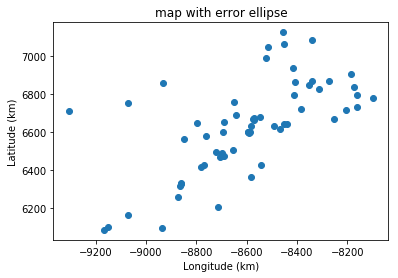

In [84]:
covlatlon = covm[1:3,1:3]
print(covlatlon)

from matplotlib.patches import Ellipse
w,v = np.linalg.eig(covlatlon)
major = 2*np.sqrt(w[0])
minor = 2*np.sqrt(w[1])
print('w',w)
print('v',v)
rota = np.degrees(np.arctan2(v[1,0],v[0,0]))
print('rota', rota)
fig, ax = plt.subplots()
plt.title('map with error ellipse')
plt.xlabel('Longitude (km)')
plt.ylabel('Latitude (km)')
e = Ellipse(xy=(x_o,y_o),width=major,height=minor,angle=rota)
e.set_facecolor('none')
ax.set_alpha(0.1)
ax.add_artist(e)
ax.scatter(lon, lat)

Submit a report of this process and your findings. The report should answer the above questions roughly in the order that they are asked in. The report needs to have your name, sections, page numbers, legible and comprehensible English that preferably is grammatically correct and with minimal spelling errors, figures with descriptive captions and labeled axes, page numbers, an appendix with python code (Jupyter Notebooks accepted), and other common-sense elements. 